# Exploratory Analysis

This project aims to explore and analyze data related to Bitcoin, focusing primarily on its value fluctuations and the factors influencing them. The primary objective is to develop a predictive model that accurately forecasts Bitcoin's future value based on historical data and other relevant indicators. This initial exploration is a crucial step in understanding the data's nature, trends, and potential challenges we might face in the modeling phase.

Objectives of the Exploratory Data Analysis
To gain a comprehensive understanding of the dataset's structure and content.
To identify key features that may influence Bitcoin's value.
To detect any anomalies or patterns within the data that could impact the accuracy of the predictive model.
To formulate hypotheses about the relationships between different variables and Bitcoin's value.

## Importing Libraries

In [23]:
# Importing essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting display options for better notebook readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Setting the style for matplotlib and seaborn for better visuals
plt.style.use('ggplot')
sns.set(style='whitegrid')


## Loading Data

We will load 3 data files: external, global, by actor.
- EXTERNAL : gives the variation of the price of Bitcoin by data coming directly from platforms, not from the blockchain.
- GLOBAL : 
- BY_ACTOR : 


In [26]:
# Chemin d'accès aux fichiers de données
path_to_data = '../data/timeseries/task1/'

external_df = pd.read_csv(path_to_data + 'external.csv')
global_df = pd.read_csv(path_to_data + 'global.csv')
by_actor_df = pd.read_csv(path_to_data + 'by_actor.csv')

# Affichage des premières lignes pour un aperçu initial
print("External Data - First 5 Rows:")
print(external_data.head())
print("/nBlockchain Global Data - First 5 Rows:")
print(blockchain_global_data.head())
print("/nBlockchain by Actor Data - First 5 Rows:")
print(blockchain_by_actor_data.head())


External Data - First 5 Rows:
   week  weekday  PriceUSD   HashRate
0     1        0    407.99 1257200.66
1     1        1    397.31 1181318.85
2     1        2    403.71 1165567.93
3     1        3    413.23 1047436.05
4     1        4    411.43 1212820.69
/nBlockchain Global Data - First 5 Rows:
   week  weekday   total_fee  total_received_satoshi  total_sent_satoshi  \
0     1        0  5190513996         746007804579726     745627804579726   
1     1        1  6182855480        1948706288859968    1948326288859968   
2     1        2  3935632644         201597891307650     201230391307650   
3     1        3  4422025753         292624782321220     292277282321220   
4     1        4  4463445385         230594553185058     230217053185058   

   mean_fee_satoshi  mean_feeUSD  mean_fee_for100  nb_transactions  \
0          24772.65  10106996.58             0.82           209526   
1          26570.64  10556900.02             0.70           232695   
2          24009.47   9692748.70  

## Data Preview

In [27]:
# Aperçu des dimensions des datasets
print("Dimensions of External Data:", external_df.shape)
print("Dimensions of Blockchain Global Data:", global_df.shape)
print("Dimensions of Blockchain By Actor Data:", by_actor_df.shape)

# Types de données de chaque colonne
print("\nData Types of External Data:\n", external_df.dtypes)
print("\nData Types of Blockchain Global Data:\n", global_df.dtypes)
print("\nData Types of Blockchain By Actor Data:\n",  by_actor_df.dtypes)

# Statistiques descriptives de base
print("\nBasic Descriptive Statistics of External Data:\n", external_df.describe())
print("\nBasic Descriptive Statistics of Blockchain Global Data:\n", global_df.describe())
print("\nBasic Descriptive Statistics of Blockchain By Actor Data:\n", by_actor_df.describe())


Dimensions of External Data: (468, 4)
Dimensions of Blockchain Global Data: (468, 20)
Dimensions of Blockchain By Actor Data: (46457, 13)

Data Types of External Data:
 week          int64
weekday       int64
PriceUSD    float64
HashRate    float64
dtype: object

Data Types of Blockchain Global Data:
 week                        int64
weekday                     int64
total_fee                   int64
total_received_satoshi      int64
total_sent_satoshi          int64
mean_fee_satoshi          float64
mean_feeUSD               float64
mean_fee_for100           float64
nb_transactions             int64
nb_payments                 int64
mean_nb_inputs            float64
mean_nb_outputs           float64
nb_mining                   int64
total_mining_satoshi        int64
newly_created_coins         int64
self_spent_satoshi          int64
total_received              int64
volume_without_self         int64
xxxx                       object
original order              int64
dtype: object

Da

- external :
    - Dimensions : 468 lignes et 4 colonnes.
    - Variables :
        - week : Numéro de la semaine.
        - weekday : Jour de la semaine (0 à 5, avec 6 étant le jour de prédiction).
        - PriceUSD : Prix du Bitcoin en USD.
        - HashRate : Taux de hachage du réseau Bitcoin.
    - Type de Données :
        - week, weekday : Entiers (int64).
        - PriceUSD, HashRate : Flottants (float64).


- global : 
    - Dimensions : 468 lignes et 20 colonnes.
    - Variables : 
        - week, weekday : Identiques à external.csv.
        - Plusieurs variables liées aux transactions sur la blockchain, telles que total_fee, total_received_satoshi, total_sent_satoshi, mean_fee_satoshi, etc.
        - xxxx : Une variable textuelle.
        - original order : Un entier indiquant l'ordre original des données.
    - Type de Données : Principalement des entiers (int64) et des flottants (float64), avec une variable textuelle.
    
- by_actor:
    - Dimensions : 46457 lignes et 13 colonnes.
    - Variables :
        - week, weekday : Identiques à external.csv.
        - identity : Identifiant de l'acteur (probablement une adresse ou un identifiant unique).
        - Variables liées aux transactions par acteur, telles que received, nb_received, sum_fee, nb_transactions, etc.
    - Type de Données : Mélange d'entiers (int64), flottants (float64), et une variable objet (pour identity).

# Data Cleaning

### Verifying if we have null values

In [32]:
print(external_df.isnull().sum())
print(global_df.isnull().sum())
print(by_actor_df.isnull().sum())


week        0
weekday     0
PriceUSD    0
HashRate    0
dtype: int64
week                      0
weekday                   0
total_fee                 0
total_received_satoshi    0
total_sent_satoshi        0
mean_fee_satoshi          0
mean_feeUSD               0
mean_fee_for100           0
nb_transactions           0
nb_payments               0
mean_nb_inputs            0
mean_nb_outputs           0
nb_mining                 0
total_mining_satoshi      0
newly_created_coins       0
self_spent_satoshi        0
total_received            0
volume_without_self       0
xxxx                      0
original order            0
dtype: int64
week                    0
weekday                 0
identity                0
received                0
nb_received             0
sum_fee                 0
mean_fee_for100         0
nb_transactions         0
sent                    0
self_spent              0
self_spent_estimated    0
nb_spent                0
spent                   0
dtype: int64


### Encoding

Identity column : ID of the actor , can be a string or a number.

In [35]:
from sklearn.preprocessing import LabelEncoder

# Création d'un label encoder
le = LabelEncoder()

# Application de l'encodage de label à la colonne 'identity'
by_actor_df['identity'] = le.fit_transform(by_actor_df['identity'])


# Data Distribution Analysis

## External DF

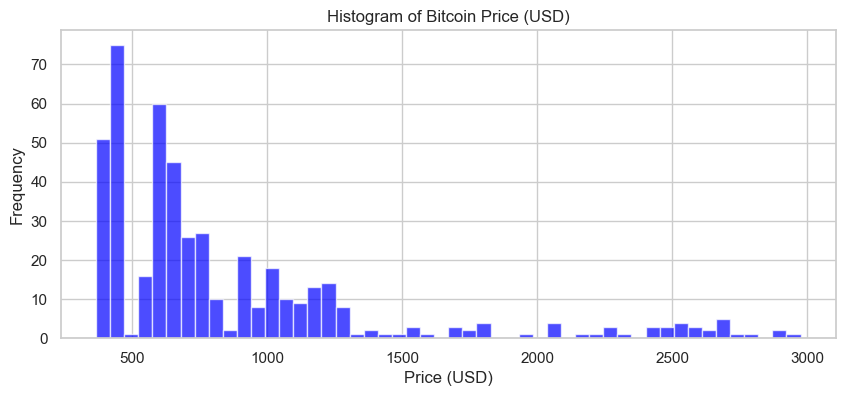

In [41]:
plt.figure(figsize=(10, 4))
plt.hist(external_df['PriceUSD'], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Bitcoin Price (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

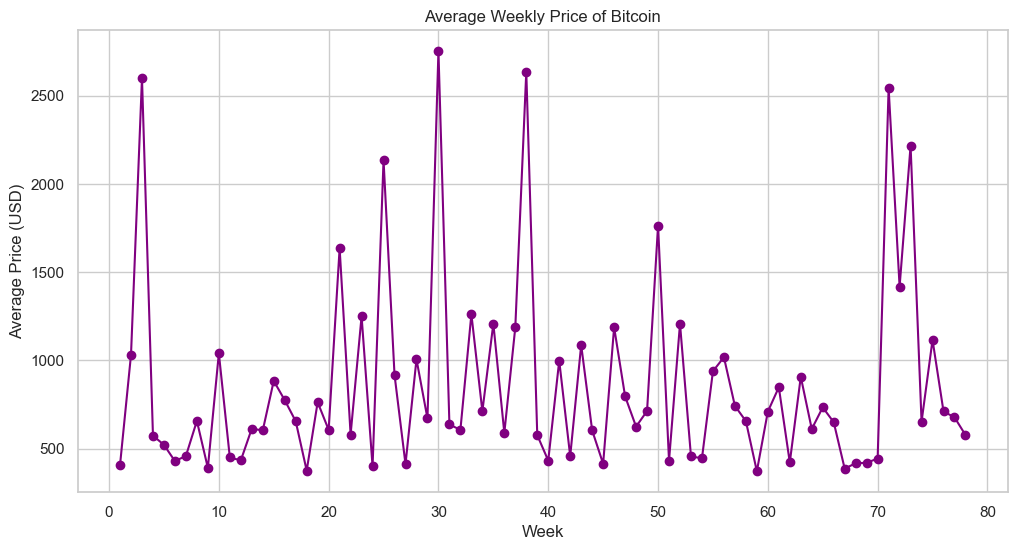

In [62]:
# Calcul de la moyenne hebdomadaire du prix du Bitcoin
weekly_price = external_df.groupby('week')['PriceUSD'].mean()

# Création du graphique
plt.figure(figsize=(12, 6))
weekly_price.plot(kind='line', marker='o', color='purple')
plt.title('Average Weekly Price of Bitcoin')
plt.xlabel('Week')
plt.ylabel('Average Price (USD)')
plt.show()


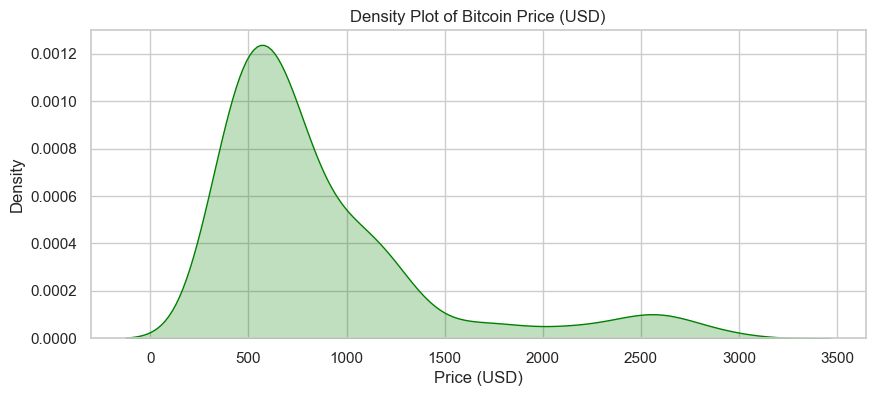

In [42]:
plt.figure(figsize=(10, 4))
sns.kdeplot(external_df['PriceUSD'], fill=True, color='green')
plt.title('Density Plot of Bitcoin Price (USD)')
plt.xlabel('Price (USD)')
plt.show()


Here we can see that the Bitcoin Price follows an unimodal distribution. The highest density is around 550 USD.

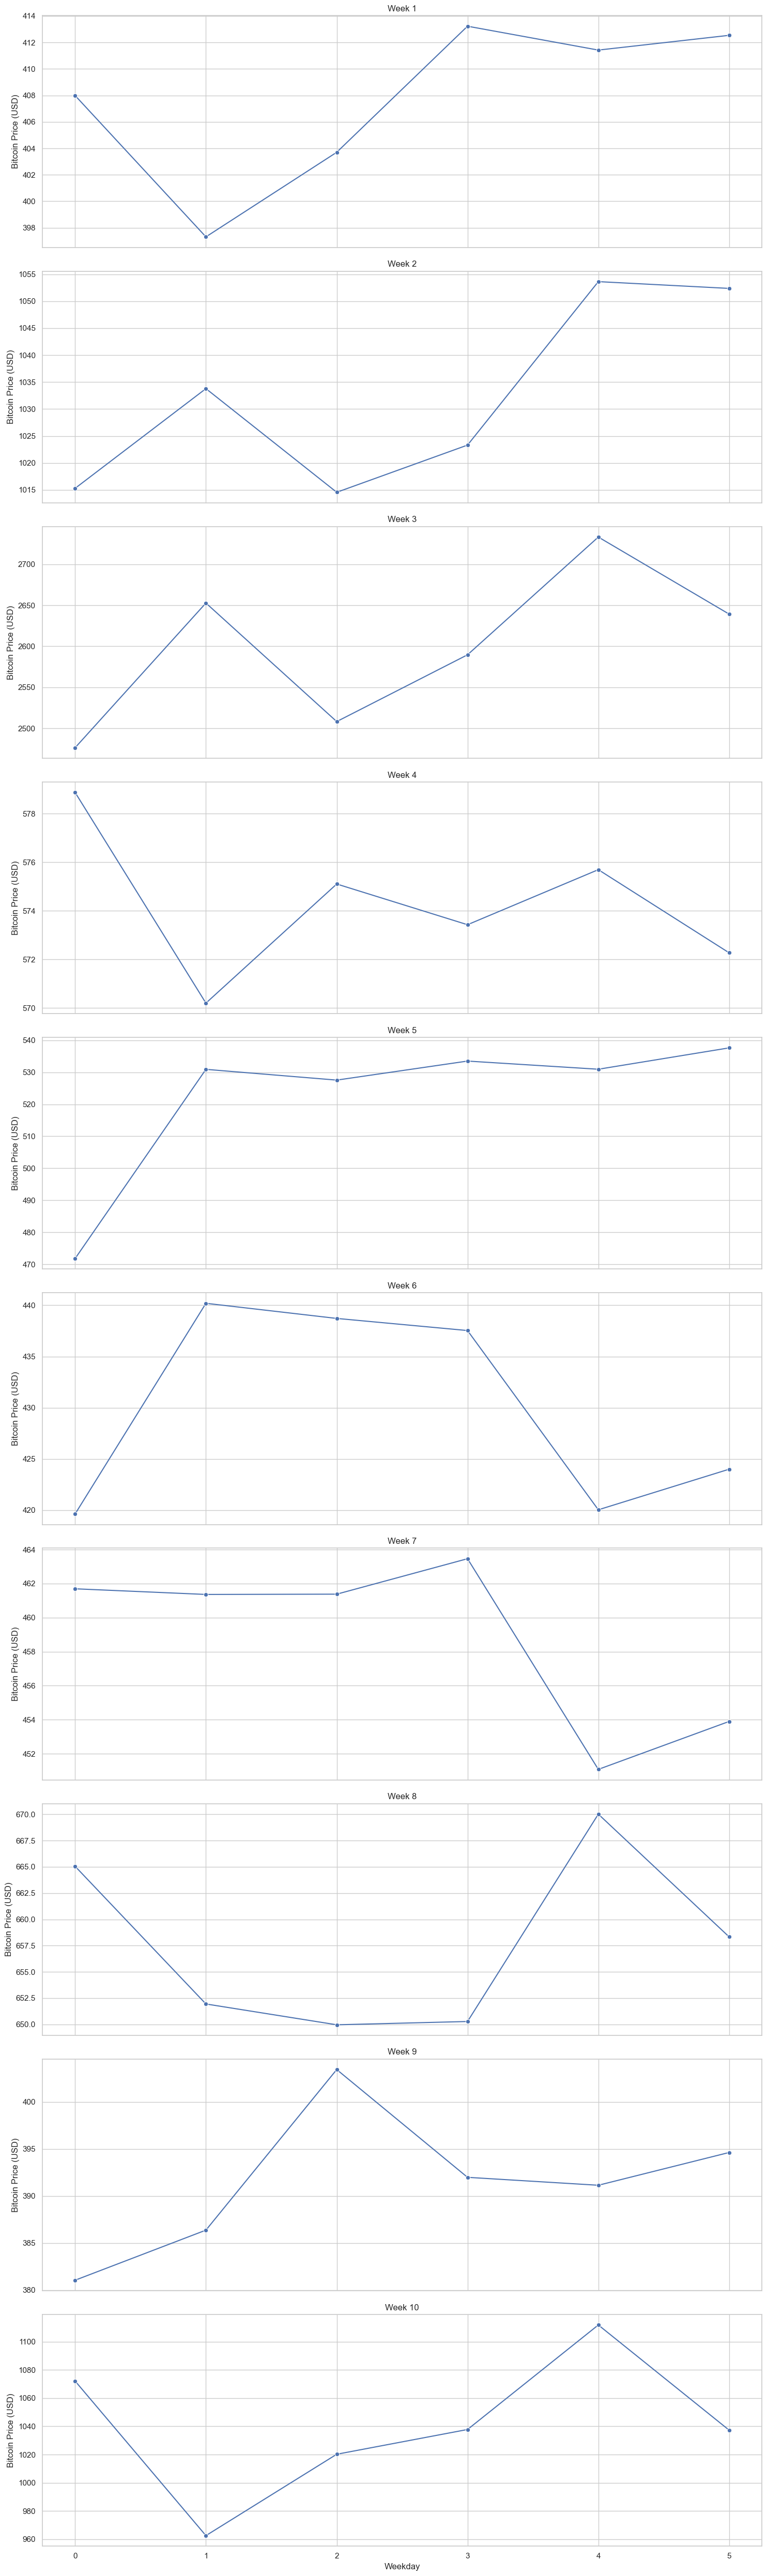

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection de la plage de 10 semaines (par exemple, semaines 1 à 10)
selected_weeks = external_df[external_df['week'].isin(range(1, 11))]

# Création des subplots
fig, axes = plt.subplots(10, 1, figsize=(15, 50), sharex=True)

# Tracer un graphique pour chaque semaine
for i, week in enumerate(range(1, 11)):
    week_data = selected_weeks[selected_weeks['week'] == week]
    sns.lineplot(x='weekday', y='PriceUSD', data=week_data, ax=axes[i], marker='o')
    axes[i].set_title(f'Week {week}')
    axes[i].set_xlabel('Weekday')
    axes[i].set_ylabel('Bitcoin Price (USD)')

plt.tight_layout()
plt.show()


Here we can see for different weeks , that the variation is less important at a day level , compared to the variations that we saw at a week level.

## GLOBAL DF

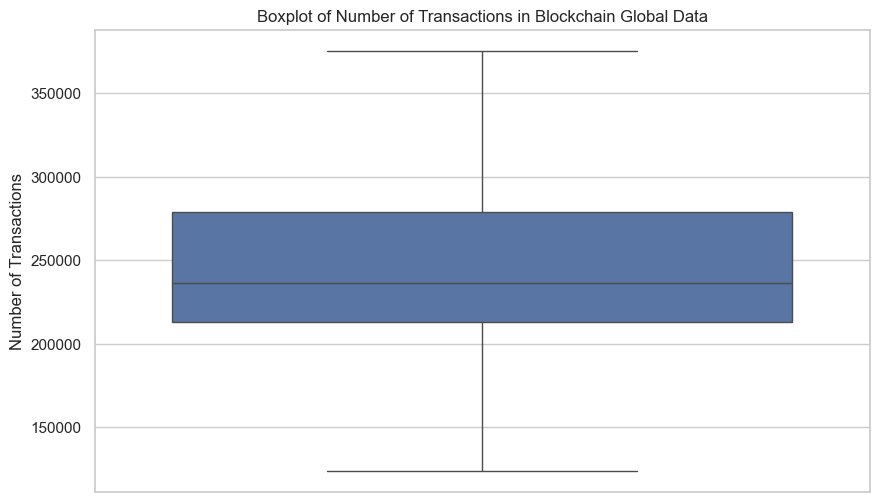

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=global_df['nb_transactions'])
plt.title('Boxplot of Number of Transactions in Blockchain Global Data')
plt.ylabel('Number of Transactions')
plt.show()


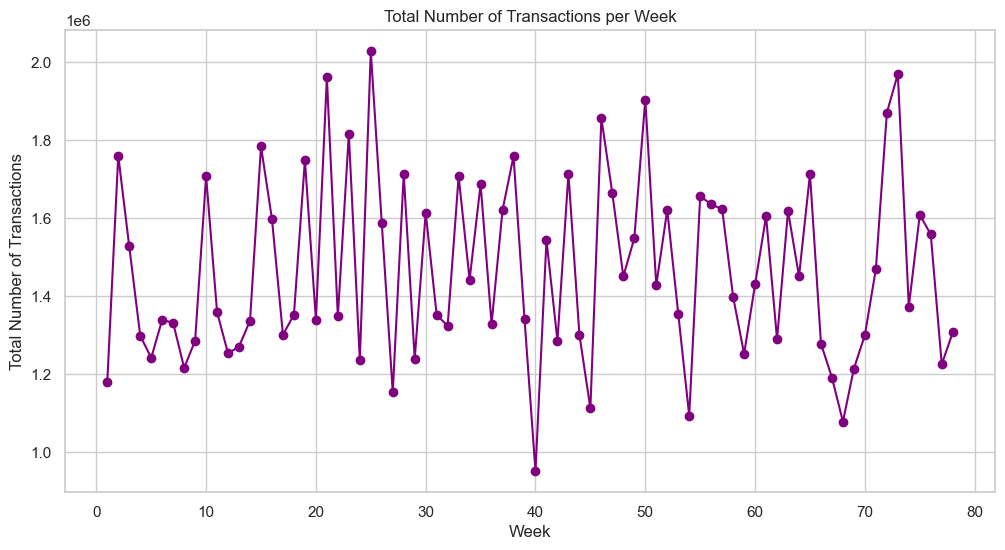

In [57]:
# Agrégation des données par semaine
weekly_transactions = global_df.groupby('week')['nb_transactions'].sum()

# Création du graphique
plt.figure(figsize=(12, 6))
weekly_transactions.plot(kind='line', marker='o', color='purple')
plt.title('Total Number of Transactions per Week')
plt.xlabel('Week')
plt.ylabel('Total Number of Transactions')
plt.show()


Here we have to note that the weeks are not well ordered. But we can see that there is a huge fluctuation between the weeks. so at a week level the price is not stable. This should not cause a problem since the price prediction that we aim to implement will be at a day level.

## By Actor

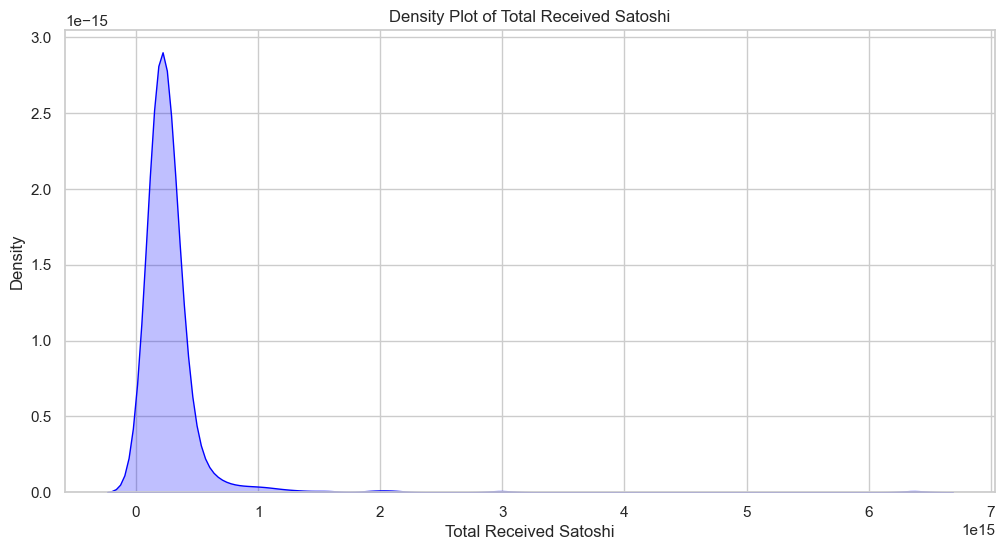

In [58]:
plt.figure(figsize=(12, 6))
sns.kdeplot(global_df['total_received_satoshi'], fill=True, color='blue')
plt.title('Density Plot of Total Received Satoshi')
plt.xlabel('Total Received Satoshi')
plt.ylabel('Density')
plt.show()

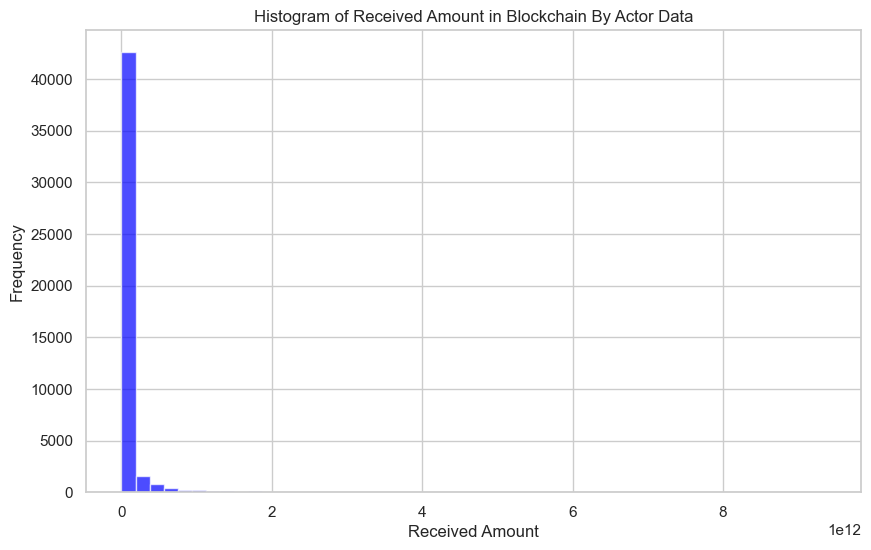

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(by_actor_df['received'], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Received Amount in Blockchain By Actor Data')
plt.xlabel('Received Amount')
plt.ylabel('Frequency')
plt.show()


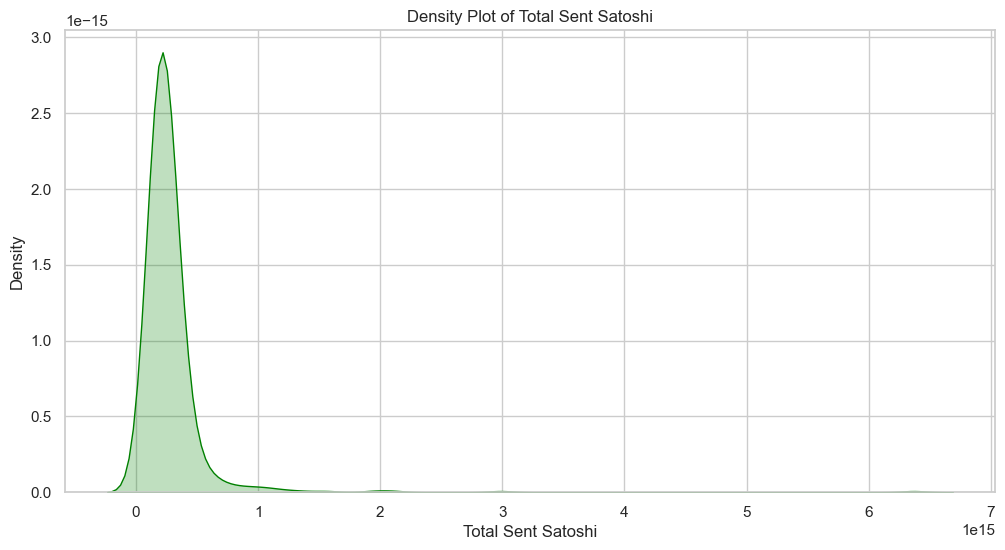

In [60]:
plt.figure(figsize=(12, 6))
sns.kdeplot(global_df['total_sent_satoshi'], fill=True, color='green')
plt.title('Density Plot of Total Sent Satoshi')
plt.xlabel('Total Sent Satoshi')
plt.ylabel('Density')
plt.show()


# MultiVariable Analysis

Now that we have an idea about the distribution of different variables, let's try to do a multivariable analysis to spot some correlations that would be useful to our prediction models.

### Correlation Matrix on external DF only

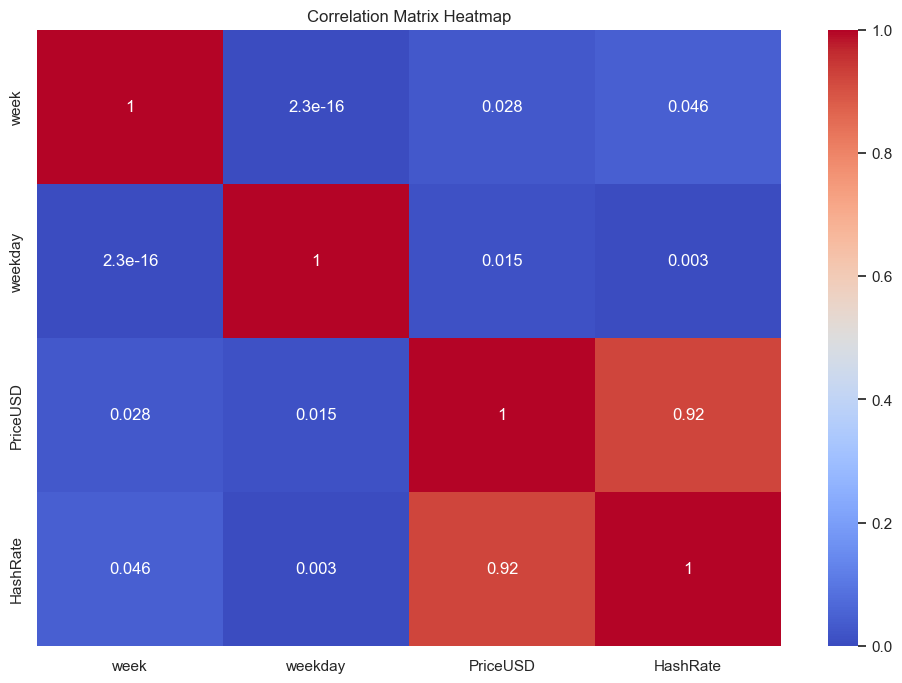

In [74]:
# Calcul des corrélations
correlation_matrix = external_df.corr()

# Heatmap des corrélations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


### HashRate and Price USD : 
hypotheses regarding the causality between the hashrate, which is a measure of the total computing power used by Bitcoin miners, and the price of Bitcoin: 
- Increased Mining Profitability Hypothesis:

    As the price of Bitcoin rises, mining becomes more profitable. This profitability attracts more miners to the network, leading to an increase in the total computing power, or hashrate. Thus, a higher Bitcoin price could cause an increase in the hashrate.

- Network Security and Confidence Hypothesis:

    A high hashrate is often perceived as a sign of the network's security and robustness. An increase in the hashrate may strengthen investors' and users' confidence in the Bitcoin network, potentially leading to an increase in the demand for Bitcoin and, consequently, its price. This suggests that an increase in hashrate could have a positive impact on Bitcoin's price.

The relationship between hashrate and price may not be static and could change over time. This variation might be due to advancements in mining technology, changes in network policies, or shifts in market conditions. It is important to consider the possibility of evolving dynamics when analyzing the relationship between hashrate and price.

Following this hypothesis, we'll try to take the hashrate as a feature of our prediction models.

### Correlation Matrix on Global DF merged to Price Column

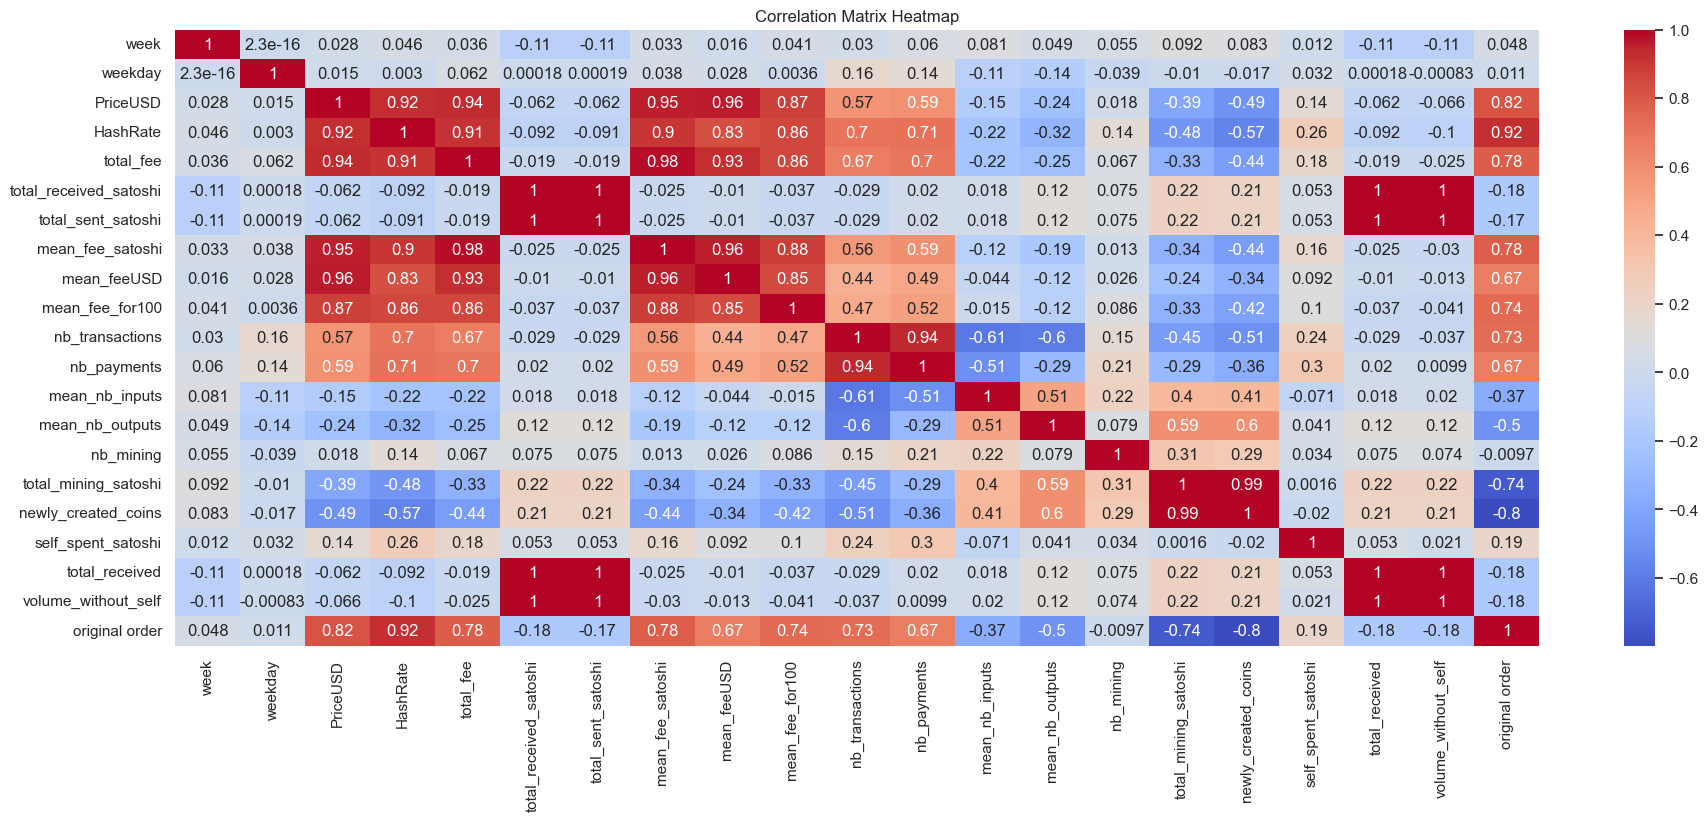

In [82]:
# Fusion des datasets
merged_df = pd.merge(external_df, global_df, on=['week', 'weekday'])

merged_df = merged_df.drop(columns=['xxxx'])
merged_df = merged_df.drop(columns=['time'])

merged_df.head()

# Calcul des corrélations
correlation_matrix = merged_df.corr()

plt.figure(figsize=(22, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()



Here we can see that the Price is: 
- strongly correlated with : 
    - mean_fee_for_100
    - mean_fee
    - total_fee
    - original_order
- moderately correlated with : 
    - nb_transactions
    - nb_payments
- negatively correlated with : 
    - total_mining_satoshi
    - newly_created_coins 


### Correlation Matrix on By_Actor_DF

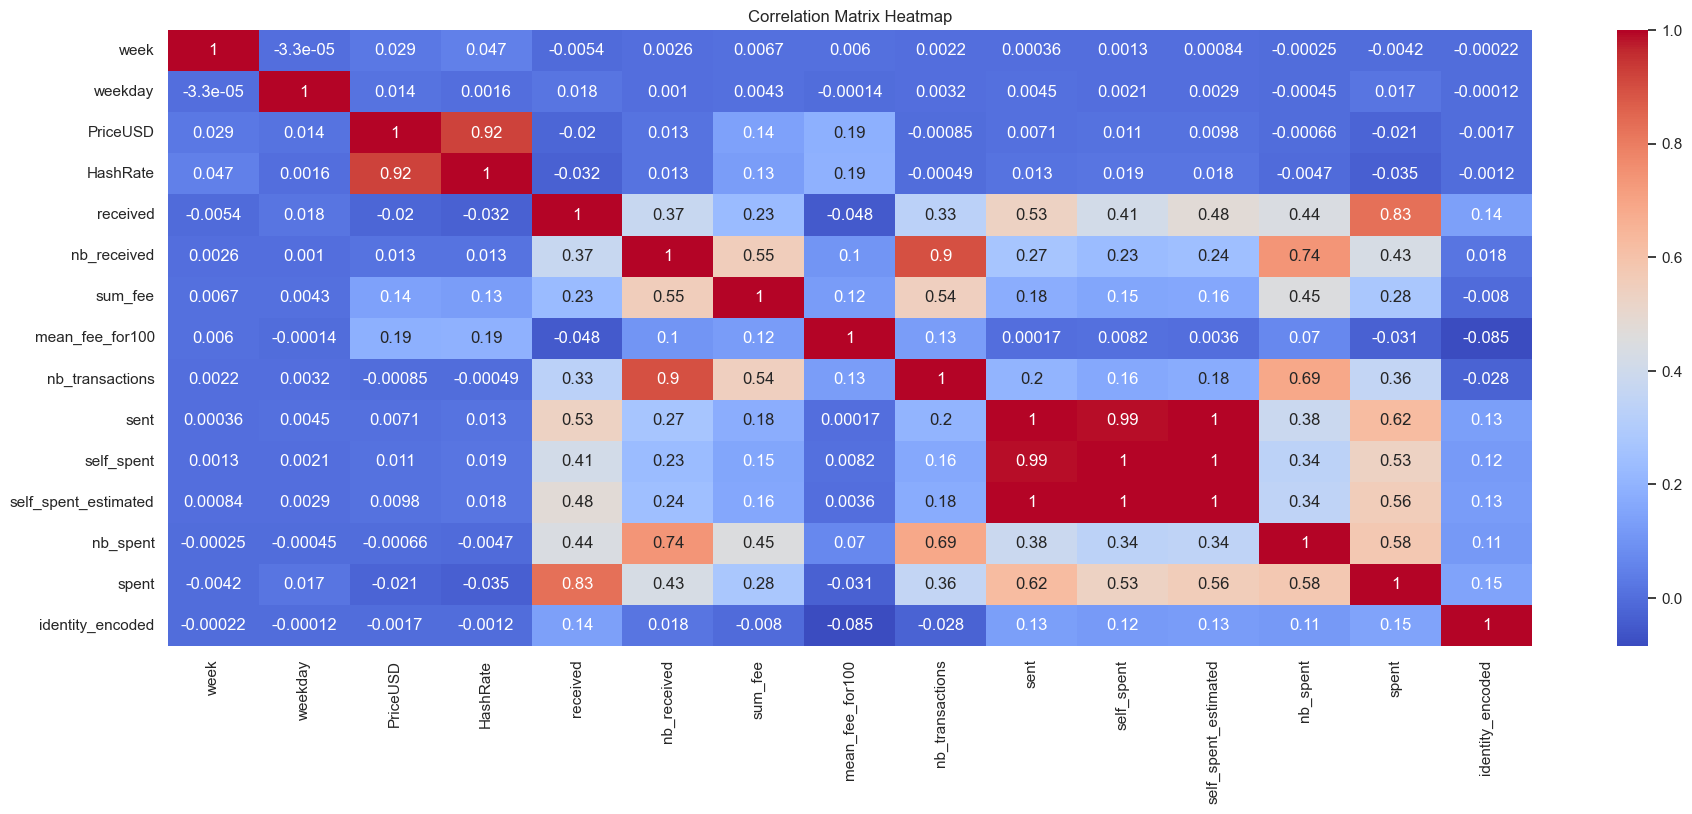

In [84]:
# Fusion des datasets
merged_df = pd.merge(external_df, by_actor_df, on=['week', 'weekday'])

# Suppression des colonnes non numériques si nécessaire
# Par exemple, si 'identity' est une colonne non numérique dans by_actor_df
if 'identity' in merged_df.columns:
    merged_df = merged_df.drop(columns=['identity'])

# Calcul des corrélations
correlation_matrix = merged_df.corr()

# Extraction et affichage des corrélations avec PriceUSD
correlations_with_price = correlation_matrix['PriceUSD']

plt.figure(figsize=(22, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()



